# Project: Wrangle and Analyze Data

## Gather

This section shows the programmatic approch to gather the data required for this project.

In [1]:
# Import major python packages required.
import pandas as pd
import numpy as np
import requests as rq
import tweepy
import json as jsn
import os

In [2]:
# Load csv file on hand (twitter-archive-enhanced.csv) as a pandas DataFrame (name = df_tae)
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Downloading a file from Internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

# Save downloaded content into a file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
df_img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_img_predictions.to_csv('image_predictions.csv', index = False)

In [8]:
# Twitter Access Keys

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [9]:
# Get access to Twitter and create an API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [11]:
# Create a list of tweet_id to use in a for loop to gather tweet data using tweepy
tweet_ids = df_tae.tweet_id.values
len(tweet_ids)

2356

In [12]:
import time

# Query Twitter API to download json data for each tweet_id
# in the DataFrame df_tae (i.e. 'twitter_archive_enhanced.csv file')
count = 0
fails_dict = {}
start = time.time()

# Save each tweet's returned json as a new line in the text file 'tweet_json.txt'
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ': ' + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print('Success')
            jsn.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print('Attempted to get status of ' + str(count) + ' tweet_ids\n'
     + 'from the total of ' + str(len(tweet_ids)) + '\n'
     + 'Success = ' + str(count - len(fails_dict)) + '\n'
     + 'Failed = ' + str(len(fails_dict)))

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
2026: 671882082306625538
Success
2027: 671879137494245376
Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
20

Success
2276: 667453023279554560
Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
23

In [13]:
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

In [8]:
import json
import pandas as pd

df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

df_retweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
df_retweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8185,37515
1,892177421306343426,6054,32242
2,891815181378084864,4005,24286
3,891689557279858688,8332,40854
4,891327558926688256,9033,39057


In [10]:
df_retweet.to_csv('retweet_favorite_count.csv', index = False)

## Assess

This section will assess the data gathered for cleanliness and tidiness, programmatically.

In [11]:
# Read the three CSV files into DataFrames
df_tae = pd.read_csv('twitter-archive-enhanced.csv')
df_ipr = pd.read_csv('image_predictions.csv')
df_rfc = pd.read_csv('retweet_favorite_count.csv')

In [12]:
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Check for duplicated rows - if there is no 'True' counts then there is no duplicated rows.
df_tae.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [15]:
df_tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# There are 181 records of retweet
# also evident by 181 non-null records in 
# retweeted_status_id, retweeted_ status_user_id and retweeted_status_timestamp columns
# Further confirmed by text records sarting with 'RT @'
len(df_tae[df_tae.text.str.startswith('RT @')])

181

In [17]:
# There are 64 records of non dog post records
# These records have texts that contains 'We (or we) only rate dogs'
len(df_tae[df_tae.text.str.contains('only rate dogs')])

64

In [18]:
# 84 dog names are not correct, they are dictionary words instead (a, such, the, by...etc)
df_tae.name[(df_tae.name.str.islower() == True)].values

array(['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not',
       'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just',
       'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old',
       'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very',
       'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a',
       'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an',
       'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'], dtype=object)

In [19]:
# There are 158 expanded urls which are not 'twitter.com/dog_rates'
df_tae.expanded_urls[df_tae.expanded_urls.str.contains('twitter.com/dog_rates') == False]

35      https://twitter.com/4bonds2carbon/status/88551...
42      https://twitter.com/kaijohnson_19/status/88396...
72      https://twitter.com/bbcworld/status/8785998685...
78      https://twitter.com/rachel2195/status/87685077...
83      https://twitter.com/mpstowerham/status/8761629...
88      https://twitter.com/drboondoc/status/874413398...
101     https://twitter.com/loganamnosis/status/872657...
110     https://twitter.com/animalcog/status/871075758...
130     https://twitter.com/rachaeleasler/status/86501...
133     https://twitter.com/nbcnews/status/86645871888...
160     https://twitter.com/tallylott/status/860914485...
180     https://twitter.com/AaronChewning/status/85706...
190     https://twitter.com/perfy/status/8558573181681...
192     https://twitter.com/markhalperin/status/855656...
195     https://twitter.com/frasercampbell_/status/855...
212     https://twitter.com/eddie_coe98/status/8482893...
231     https://twitter.com/basic_vacek_/status/847971...
241     https:

In [20]:
# Count of dog stages
df_tae.groupby(['doggo', 'floofer', 'pupper', 'puppo'])['tweet_id'].count()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                        puppo      29
                pupper  None      245
       floofer  None    None        9
doggo  None     None    None       83
                        puppo       1
                pupper  None       12
       floofer  None    None        1
Name: tweet_id, dtype: int64

In [21]:
# Let's see whether 'doggo' appeared more than 84 times in the text column.
idx_doggo = df_tae[df_tae.text.str.contains('doggo' or 'Doggo')].index
len(idx_doggo)

98

In [22]:
# Let's see whether 'floofer' appeared more than 10 times the text column.
idx_floofer = df_tae[df_tae.text.str.contains('floofer' or 'Floofer' or 'Floof' or 'floof')].index
len(idx_floofer)

4

In [23]:
# Let's see whether 'pupper' appeared more than 257 times in the text column.
idx_pupper = df_tae[df_tae.text.str.contains('pupper' or 'Pupper')].index
len(idx_pupper)

272

In [24]:
# Let's see whether 'puppo' appeared more than 30 times in the text column.
idx_puppo = df_tae[df_tae.text.str.contains('puppo' or 'Puppo')].index
len(idx_puppo)

37

In [25]:
df_ipr

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [26]:
df_ipr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Check for duplicated rows - if there is no 'True' counts then there is no duplicated rows.
df_ipr.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [28]:
df_ipr.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
df_rfc

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8185,37515
1,892177421306343426,6054,32242
2,891815181378084864,4005,24286
3,891689557279858688,8332,40854
4,891327558926688256,9033,39057
5,891087950875897856,3000,19630
6,890971913173991426,1984,11473
7,890729181411237888,18177,63292
8,890609185150312448,4119,27005
9,890240255349198849,7108,30929


In [30]:
df_rfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [31]:
# Check for duplicated rows - if there is no 'True' counts then there is no duplicated rows.
df_rfc.tweet_id.duplicated().value_counts()

False    2337
Name: tweet_id, dtype: int64

In [32]:
df_rfc.describe()

,tweet_id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2875.934959,7838.608472
std,6.824243e+16,4858.328804,12149.238430
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,579.000000,1361.000000
50%,7.185406e+17,1344.000000,3419.000000
75%,7.986825e+17,3354.000000,9604.000000
max,8.924206e+17,82413.000000,162012.000000


In [33]:
all_columns = pd.Series(list(df_tae) + list(df_ipr) + list(df_rfc))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality
    
#### `twitter_archive_enhanced` table
- There are 181 retweet records (rows), we don’t need retweet records here. Need to remove.
- There are 78 records with in_reply_to_status_id values which are not belongs to the data set.¶
- There are 64 records (rows) that are not dog post. Need to remove.
- 84 dog names are not correct, they are dictionary words instead (a, such, the, by...etc).
- Missing expanded_urls and urls other than twitter.com/dog_rates
- There 1976 records that does not define a dog stage (doggo, floofer, pupper, puppo all none for these records) - may not be able to fix.
- Five unneccessary columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). 

#### `image_predictions` table
- Non-descriptive column names (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog).
- p1_conf, p2_conf and p3_conf values should be in percentile rather than in decimals.

### Tidiness

- One variable in four columns in `twitter_archive_enhanced` table (doggo, floofer, pupper and puppo).
- Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.

## Clean

In [34]:
# Read the three CSV files into DataFrames
df_tae = pd.read_csv('twitter-archive-enhanced.csv')
df_ipr = pd.read_csv('image_predictions.csv')
df_rfc = pd.read_csv('retweet_favorite_count.csv')

In [35]:
# Make copies of the three DataFrames to clean
df_tae_clean = df_tae.copy()
df_ipr_clean = df_ipr.copy()
df_rfc_clean = df_rfc.copy()

### Quality

<font color='blue'>
    
#### `twitter_archive_enhanced`: There are 181 retweet records (rows), we don’t need retweet records here. Need to remove.</font>

<font color='blue'>
    
##### Define
Create an array of index numbers where the rows have values in `retweeted_status_id`. Then use `drop()` to remove these rows from the DataFrame. Reset the index.</font>

<font color='blue'>

##### Code </font>

In [36]:
# Create an array of indexes to drop where retweeted_status_id column have values.
idx_todrop = df_tae_clean[df_tae_clean.retweeted_status_id.isnull() == False].index

# Drop the rows corresponding to those indexes.
df_tae_clean.drop(idx_todrop, axis=0, inplace = True)

# Reset the indexes
df_tae_clean.reset_index(drop=True, inplace=True)

<font color='blue'>

##### Test </font>

In [37]:
# There must be 0 non-null records in the columns:
    # retweeted_status_id
    # retweeted_status_user_id
    # retweeted_status_timestamp
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

<font color='blue'>
    
#### `twitter_archive_enhanced`: There are 78 records with `in_reply_to_status_id` values which are not belongs to the data set.</font>

<font color='blue'>
    
##### Define
Create an array of index numbers where the rows have values in `in_reply_to_status_id`. Then use `drop()` to remove these rows from the DataFrame. Reset the index.</font>

<font color='blue'>

##### Code </font>

In [38]:
# Create an array of indexes to drop where in_reply_to_status_id column have values.
idx_todrop = df_tae_clean[df_tae_clean.in_reply_to_status_id.isnull() == False].index

# Drop the rows corresponding to those indexes.
df_tae_clean.drop(idx_todrop, axis=0, inplace = True)

# Reset the indexes
df_tae_clean.reset_index(drop=True, inplace=True)

<font color='blue'>

##### Test </font>

In [39]:
# There must be 0 non-null records in the columns:
    # in_reply_to_status_id
    # in_reply_to_user_id
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

<font color='blue'>
    
#### `twitter_archive_enhanced`: There are 64 records (rows) that are not dog post. Need to remove.</font>

<font color='blue'>
    
##### Define
Create an array of index numbers for the rows with `text` column contains the phrase "only rate dogs". Then use `drop()` to remove these rows from the DataFrame. Reset the index.</font>

<font color='blue'>

##### Code </font>

In [40]:
# Create an array of indexes to drop where the text column contains the phrase "only rate dogs".
idx_todrop = df_tae_clean[df_tae_clean.text.str.contains('only rate dogs')].index

# Drop the rows corresponding to those indexes.
df_tae_clean.drop(idx_todrop, axis=0, inplace = True)

# Reset the indexes
df_tae_clean.reset_index(drop=True, inplace=True)

<font color='blue'>

##### Test </font>

In [41]:
# Find how many records have the 'only rate dogs'
len(idx_todrop)

54

In [42]:
# The total number of records must be 2097 - 54 = 2043.
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 17 columns):
tweet_id                      2043 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2043 non-null object
source                        2043 non-null object
text                          2043 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2040 non-null object
rating_numerator              2043 non-null int64
rating_denominator            2043 non-null int64
name                          2043 non-null object
doggo                         2043 non-null object
floofer                       2043 non-null object
pupper                        2043 non-null object
puppo                         2043 non-null object
dtypes: float64(4), int64(3), object(10)

<font color='blue'>
    
#### `twitter_archive_enhanced`: 84 dog names are not correct, they are dictionary words instead (a, such, the, by...etc).</font>

<font color='blue'>
    
##### Define
The incorrect dog names are apeared in small letters in the `name` colum. Therefore, we create an array of small letter words in the `name` column and then using `pandas.DataFrame.replace()` function replce all appearences of those words in the `name` column</font>

<font color='blue'>

##### Code </font>

In [43]:
# Create the array of small letter words (all are dictionary words) in the 'name' column.
non_names = df_tae_clean.name[(df_tae_clean.name.str.islower() == True)].values
df_tae_clean.replace(to_replace = non_names, value = np.NaN, inplace = True)

# Print the non_names array
non_names

array(['such', 'a', 'not', 'one', 'a', 'my', 'one', 'not', 'his', 'one',
       'a', 'a', 'an', 'actually', 'a', 'just', 'mad', 'this', 'all',
       'old', 'infuriating', 'a', 'a', 'a', 'a', 'a', 'just', 'a', 'the',
       'by', 'officially', 'a', 'the', 'the', 'a', 'a', 'life', 'a', 'one',
       'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an',
       'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'], dtype=object)

<font color='blue'>

##### Test </font>

In [44]:
# Re-create the non_names array and it must be an empty array now.
non_names = df_tae_clean.name[(df_tae_clean.name.str.islower() == True)].values
non_names

array([], dtype=object)

<font color='blue'>
    
#### `twitter_archive_enhanced`:  Five unneccessary columns
('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp').</font>

<font color='blue'>
    
##### Define
Remove the five columns.
</font>

<font color='blue'>

##### Code </font>

In [45]:
column_names_todrop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_tae_clean.drop(column_names_todrop, axis = 1, inplace = True)

<font color='blue'>

##### Test </font>

In [46]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 12 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null object
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  1959 non-null object
doggo                 2043 non-null object
floofer               2043 non-null object
pupper                2043 non-null object
puppo                 2043 non-null object
dtypes: int64(3), object(9)
memory usage: 191.6+ KB


<font color='blue'>
    
#### `image_predictions`: Non-descriptive column names (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog).</font>

<font color='blue'>
    
##### Define
Rename the columns as:
    - p1: first_prediction
    - p1_conf: first_confidence
    - p1_dog: first_dog
    - p2: second_prediction
    - p2_conf: second_confidence
    - p2_dog: second_dog
    - p3: third_prediction
    - p3_conf: third_confidence
    - p3_dog: third_dog 
</font>

<font color='blue'>

##### Code </font>

In [47]:
df_ipr_clean.rename(index = str, columns={"p1": "first_prediction",
                                        "p1_conf": "first_confidence",
                                        "p1_dog": "first_dog",
                                        "p2": "second_prediction",
                                        "p2_conf": "second_confidence",
                                        "p2_dog": "second_dog",
                                        "p3": "third_prediction",
                                        "p3_conf": "third_confidence",
                                        "p3_dog": "third_dog"}, inplace = True)

<font color='blue'>

##### Test </font>

In [48]:
df_ipr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog            2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog           2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


<font color='blue'>
    
#### `image_predictions`: p1_conf, p2_conf and p3_conf values should be in percentile rather than in decimals.</font>

<font color='blue'>
    
##### Define
These three columns are now named as first_confidence, second_confidence, third_confidence. Multiply the values in these columns replace the decimal with the resulting value. 
</font>

<font color='blue'>

##### Code </font>

In [49]:
df_ipr_clean.first_confidence = df_ipr_clean.first_confidence * 100
df_ipr_clean.second_confidence = df_ipr_clean.second_confidence * 100
df_ipr_clean.third_confidence = df_ipr_clean.third_confidence * 100

<font color='blue'>

##### Test </font>

In [50]:
df_ipr_clean.describe()

,tweet_id,img_num,first_confidence,second_confidence,third_confidence
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2.075000e+03
mean,7.384514e+17,1.203855,59.454826,13.458861,6.032417e+00
std,6.785203e+16,0.561875,27.117352,10.066574,5.090593e+00
min,6.660209e+17,1.000000,4.433340,0.000001,1.740170e-08
25%,6.764835e+17,1.000000,36.441200,5.388625,1.622240e+00
50%,7.119988e+17,1.000000,58.823000,11.818100,4.944380e+00
75%,7.932034e+17,1.000000,84.385500,19.556550,9.180755e+00
max,8.924206e+17,4.000000,100.000000,48.801400,2.734190e+01


<font color = 'red'>*Note: The remainning quilty issuses will be re-asseced and fixed after cleaning for tidiness.</font>

### Tidiness

<font color='blue'>
    
#### `twitter_archive_enhanced`: One variable in four columns in twitter_archive_enhanced table (doggo, floofer, pupper and puppo).</font>

<font color='blue'>
    
##### Define
The four columns describes stages of dogs. Therefore, the information in these four columns will be summarized into a single column named, `stage` and the values in this columns will be the four stages ('doggo', 'floofer', 'pupper', and 'puppo') plus 'none' for records without any stage data and 'multiple' for records with more than one stage data.</font>

<font color='blue'>

##### Code </font>

In [51]:
# Make column values to 1 if the stage is correct otherwise 0 in all for stages columns
df_tae_clean['doggo'] = [0 if x == 'None' else 1 for x in df_tae_clean['doggo']]
df_tae_clean['floofer'] = [0 if x == 'None' else 1 for x in df_tae_clean['floofer']]
df_tae_clean['pupper'] = [0 if x == 'None' else 1 for x in df_tae_clean['pupper']]
df_tae_clean['puppo'] = [0 if x == 'None' else 1 for x in df_tae_clean['puppo']]

# Create a column for no stage named 'none' and set value equal to 1 if there is no stage and otherwise 0.
df_tae_clean['none'] = df_tae_clean['doggo'] + df_tae_clean['floofer'] + df_tae_clean['pupper'] + df_tae_clean['puppo']
df_tae_clean['none'] = [1 if x == 0 else 0 for x in df_tae_clean['none']]

# Create a column for multi stages named 'multiple' and set value equal to 1 if there are more than one stage and otherwise 0.
df_tae_clean['multiple'] = df_tae_clean['doggo'] + df_tae_clean['floofer'] + df_tae_clean['pupper'] + df_tae_clean['puppo'] + df_tae_clean['none']
df_tae_clean['multiple'] = [1 if x > 1 else 0 for x in df_tae_clean['multiple']]

# Replace values (1's with 0's) in dog stage columns (doggo, floofer, pupper and puppo) if multiple stage is 1
df_tae_clean.loc[df_tae_clean.multiple == 1, ['doggo', 'floofer', 'pupper', 'puppo']] = 0, 0, 0, 0

In [52]:
# Create the stage column using melt()
df_tae_clean = pd.melt(df_tae_clean, id_vars=['tweet_id', 'timestamp','source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='stage', value_name = 'stage_name')

In [53]:
# Keep the records with only stage_name == 1.
df_tae_clean = df_tae_clean[df_tae_clean['stage_name'] == 1]

In [54]:
# Drop the stage_name column
df_tae_clean.drop(['stage_name'], axis = 1, inplace = True)
df_tae_clean.reset_index(drop=True, inplace=True)

<font color='blue'>

##### Test </font>

In [55]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null object
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  1959 non-null object
stage                 2043 non-null object
dtypes: int64(3), object(6)
memory usage: 143.7+ KB


In [56]:
df_tae_clean.groupby(['stage'])['tweet_id'].count()

stage
doggo         72
floofer        9
multiple      11
none        1707
pupper       221
puppo         23
Name: tweet_id, dtype: int64

In [57]:
# A record with one dog stage (puppo)
df_tae_clean[df_tae_clean.tweet_id == 889531135344209921]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
303,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo


In [58]:
# A record with no dog stage
df_tae_clean[df_tae_clean.tweet_id == 892420643555336193]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
325,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none


In [59]:
# A record with multiple dog stage
df_tae_clean[df_tae_clean.tweet_id == 855851453814013952]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2032,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,multiple


<font color='blue'>
    
#### Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.</font>

<font color='blue'>
    
##### Define
Inner Merge the `retweet_favorite_count` table to `twitter_archive_enhanced` table on 'twitter_id.
Then, inner merged the `image_predictions` table to that.
</font>

<font color='blue'>

##### Code </font>

In [60]:
df_tae_clean = pd.merge(df_tae_clean, df_rfc_clean, on=['tweet_id'], how='inner')

In [61]:
# Inner merged the tabel'df_ipr'.
df_merged = pd.merge(df_tae_clean, df_ipr_clean, on=['tweet_id'], how='inner')

<font color='blue'>

##### Test </font>

In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 1913
Data columns (total 22 columns):
tweet_id              1914 non-null int64
timestamp             1914 non-null object
source                1914 non-null object
text                  1914 non-null object
expanded_urls         1914 non-null object
rating_numerator      1914 non-null int64
rating_denominator    1914 non-null int64
name                  1836 non-null object
stage                 1914 non-null object
retweet_count         1914 non-null int64
favorite_count        1914 non-null int64
jpg_url               1914 non-null object
img_num               1914 non-null int64
first_prediction      1914 non-null object
first_confidence      1914 non-null float64
first_dog             1914 non-null bool
second_prediction     1914 non-null object
second_confidence     1914 non-null float64
second_dog            1914 non-null bool
third_prediction      1914 non-null object
third_confidence      1914 non-null float

In [63]:
df_merged.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7108,...,1,Pembroke,51.1319,True,Cardigan,45.103800,True,Chihuahua,2.924820,True
1,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2876,...,1,German_shepherd,70.7046,True,malinois,19.939600,True,Norwegian_elkhound,4.914760,True
2,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5275,...,2,Labrador_retriever,47.6913,True,Chesapeake_Bay_retriever,17.414500,True,German_short-haired_pointer,9.286140,True
3,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3377,...,2,komondor,97.4781,True,briard,2.004130,True,swab,0.322824,False
4,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3082,...,1,Chihuahua,95.5156,True,toy_terrier,0.805373,True,muzzle,0.629563,False


### Quality continue...

<font color='blue'>
    
#### `twitter_archive_enhanced` Missing expanded_urls and urls other than 'twitter.com/dog_rates'.
</font>

<font color='blue'>
    
##### Define
This issue should have beeen resolved by now.</font>

<font color='blue'>

##### Code </font>

<font color = 'blue'> Not required. </font>

<font color='blue'>

##### Test </font>

In [65]:
# This code should produce an empty Series.
df_merged.tweet_id[df_merged.expanded_urls.isna()]

Series([], Name: tweet_id, dtype: int64)

In [66]:
# This code should produce an empty Series.
df_merged.expanded_urls[df_merged.expanded_urls.str.contains('twitter.com/dog_rates') == False]

Series([], Name: expanded_urls, dtype: object)

### Save cleaned Data Frame as a csv files

In [67]:
df_merged.to_csv('twitter_archive_master.csv', index = False)

## Analysis and Visualizations

In [68]:
df_tam = pd.read_csv('twitter_archive_master.csv')

In [69]:
df_tam.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7108,...,1,Pembroke,51.1319,True,Cardigan,45.103800,True,Chihuahua,2.924820,True
1,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2876,...,1,German_shepherd,70.7046,True,malinois,19.939600,True,Norwegian_elkhound,4.914760,True
2,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5275,...,2,Labrador_retriever,47.6913,True,Chesapeake_Bay_retriever,17.414500,True,German_short-haired_pointer,9.286140,True
3,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3377,...,2,komondor,97.4781,True,briard,2.004130,True,swab,0.322824,False
4,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3082,...,1,Chihuahua,95.5156,True,toy_terrier,0.805373,True,muzzle,0.629563,False


In [70]:
import matplotlib.pyplot as plt

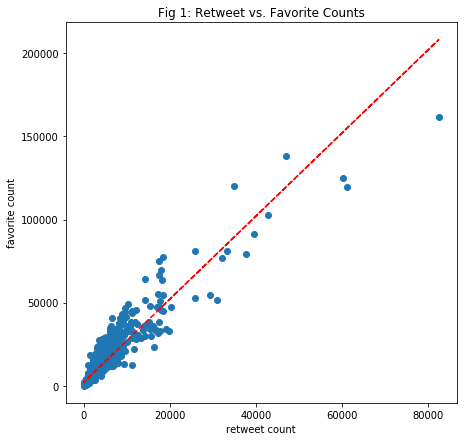

In [91]:
plt.figure(figsize=(7, 7))
plt.scatter(x = df_tam.retweet_count, y = df_tam.favorite_count);
plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.title('Fig 1: Retweet vs. Favorite Counts')

x = df_tam.retweet_count
y = df_tam.favorite_count

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.savefig('retweet_vs_favorite', dpi = 100)

In [72]:
df_tam.retweet_count.corr(df_tam.favorite_count)

0.92906361436188223

In [73]:
df_tam.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,first_confidence,first_dog,second_confidence,second_dog,third_confidence,third_dog
tweet_id,1.000000,0.024993,-0.016974,0.379979,0.607803,0.215069,0.105628,0.120756,-0.002578,0.122812,-0.048143,0.100043
rating_numerator,0.024993,1.000000,0.185666,0.019440,0.017137,-0.003519,-0.006944,-0.031063,-0.020079,-0.036630,-0.004577,-0.031289
rating_denominator,-0.016974,0.185666,1.000000,-0.017004,-0.023979,-0.017320,0.008470,-0.004481,-0.032457,-0.005897,0.006485,-0.000404
retweet_count,0.379979,0.019440,-0.017004,1.000000,0.929064,0.104775,0.050195,0.005369,-0.019924,0.009665,-0.041699,0.017293
favorite_count,0.607803,0.017137,-0.023979,0.929064,1.000000,0.130192,0.073752,0.046318,-0.022925,0.048075,-0.050614,0.044066
img_num,0.215069,-0.003519,-0.017320,0.104775,0.130192,1.000000,0.208940,0.032733,-0.161227,0.057395,-0.141673,0.060663
first_confidence,0.105628,-0.006944,0.008470,0.050195,0.073752,0.208940,1.000000,0.125015,-0.509989,0.137407,-0.705784,0.116122
first_dog,0.120756,-0.031063,-0.004481,0.005369,0.046318,0.032733,0.125015,1.000000,0.112084,0.640414,0.053869,0.565891
second_confidence,-0.002578,-0.020079,-0.032457,-0.019924,-0.022925,-0.161227,-0.509989,0.112084,1.000000,0.099170,0.482624,0.067168
second_dog,0.122812,-0.036630,-0.005897,0.009665,0.048075,0.057395,0.137407,0.640414,0.099170,1.000000,0.036997,0.561831


In [74]:
list(df_tam)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

In [76]:
column_names_todrop = ['tweet_id',
                       'timestamp',
                       'source',
                       'text',
                       'expanded_urls',
                       'rating_numerator',
                       'rating_denominator',
                       'name',
                       'stage',
                       'retweet_count',
                       'favorite_count',
                       'jpg_url',
                       'img_num',
                       'first_prediction',
                       'first_dog',
                       'second_prediction',
                       'second_dog',
                       'third_prediction',
                       'third_dog']
df_confidences = df_tam.drop(column_names_todrop, axis = 1)

In [77]:
df_confidences.head()

,first_confidence,second_confidence,third_confidence
0,51.1319,45.103800,2.924820
1,70.7046,19.939600,4.914760
2,47.6913,17.414500,9.286140
3,97.4781,2.004130,0.322824
4,95.5156,0.805373,0.629563


In [78]:
df_confidences.describe()

,first_confidence,second_confidence,third_confidence
count,1914.000000,1914.000000,1.914000e+03
mean,59.319869,13.474428,6.048724e+00
std,27.294548,10.118629,5.118944e+00
min,4.433340,0.000001,1.740170e-08
25%,36.022625,5.361625,1.619283e+00
50%,58.722150,11.739950,4.945765e+00
75%,84.865650,19.621775,9.218438e+00
max,100.000000,48.801400,2.734190e+01


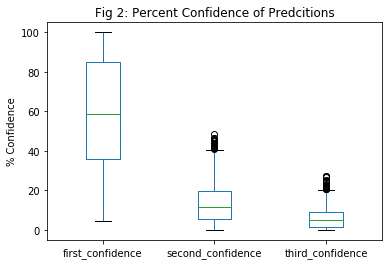

In [79]:
df_confidences.plot(kind='box');
plt.ylabel('% Confidence')
plt.title('Fig 2: Percent Confidence of Predcitions')
plt.savefig('confidence', dpi = 100)

In [81]:
df_tam.groupby(['first_dog']).first_confidence.mean()

first_dog
False    53.567585
True     61.342918
Name: first_confidence, dtype: float64

In [82]:
df_tam.groupby(['second_dog']).second_confidence.mean()

second_dog
False    11.740462
True     14.054835
Name: second_confidence, dtype: float64

In [83]:
df_tam.groupby(['third_dog']).third_confidence.mean()

third_dog
False    5.732413
True     6.168595
Name: third_confidence, dtype: float64

In [84]:
(df_tam.first_dog.value_counts() / df_tam.first_dog.count())*100

True     73.981191
False    26.018809
Name: first_dog, dtype: float64

In [85]:
(df_tam.second_dog.value_counts() / df_tam.second_dog.count())*100

True     74.92163
False    25.07837
Name: second_dog, dtype: float64

In [76]:
(df_ipm.third_dog.value_counts() / df_ipm.third_dog.count())*100

True     72.518286
False    27.481714
Name: third_dog, dtype: float64

In [86]:
df_tam.first_dog[df_tam.first_confidence > 40].value_counts()

True     1046
False     290
Name: first_dog, dtype: int64

In [87]:
df_tam.second_dog[df_tam.second_confidence > 40].value_counts()

True     26
False     5
Name: second_dog, dtype: int64

In [88]:
df_tam.third_dog[df_tam.third_confidence > 20].value_counts()

True     16
False     7
Name: third_dog, dtype: int64

# THE END